## Time Series

Time series is a sequence of information which attaches a time period to each value.e.g prices, humidity, number of people.

--The interval of time from one time point ot the next is called **Time Period** 

-- How often values of the data set are recorded is refered to as **Frequency**

All time-periods(daily, monthly, quaterly, yearly) must be EQUAL AND CLEARLY DEFINED, which would result in a  CONSTANT "frequency". 

--We forcast time series data becasue, patterns observed in the past are expected to persisit int he future.

**Main Features of Timeseries data**

**Time Dependency:** The values for every period are affected by outside factors and by the values of past periods.

* Every value is assocaited with a time period
* Intervsls between periods are constant
* patterns persist in the future

** Notation for TIme Series Data**

T = expresses the entire length of the time period like month while 
t = expresses a single time period withing the intervallike day.

X = Daily closing values for a period.

Xt = closing values over a single period

XT = closing valeus over a an entire period

the previous value can be obtained by Xt-1 (XT-1) and the next value as Xt+1 (XT+1)

**Peculiarities**
In time series data, the intervals between observations need to be identical



## Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the  Data


In [0]:
raw_data = pd.read_csv('/content/index.csv')

In [0]:
data = raw_data.copy()

## Examinng the Data

In [4]:
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
data.tail()

,date,spx,dax,ftse,nikkei
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88
6268,29/01/2018,2853.528411,13324.48,7671.533300,23629.34


In [6]:
data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [8]:
data.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [9]:
# specific
data.spx.isna().sum()


0

## Plotting the Data

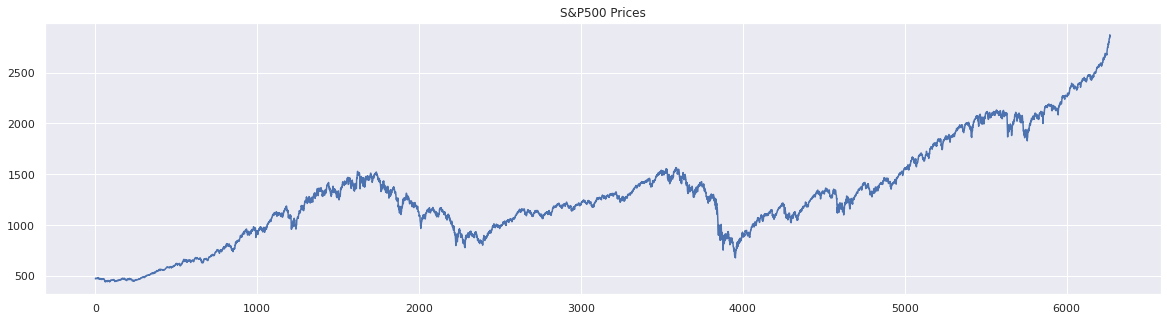

In [10]:
# spx columns
data.spx.plot(figsize= (20,5),title = "S&P500 Prices")
plt.show()

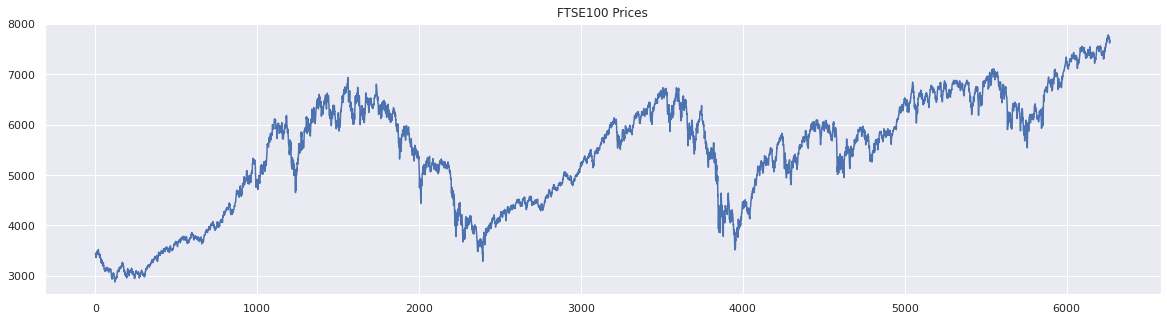

In [11]:
# ftse columns
data.ftse.plot(figsize= (20,5),title = "FTSE100 Prices")
plt.show()


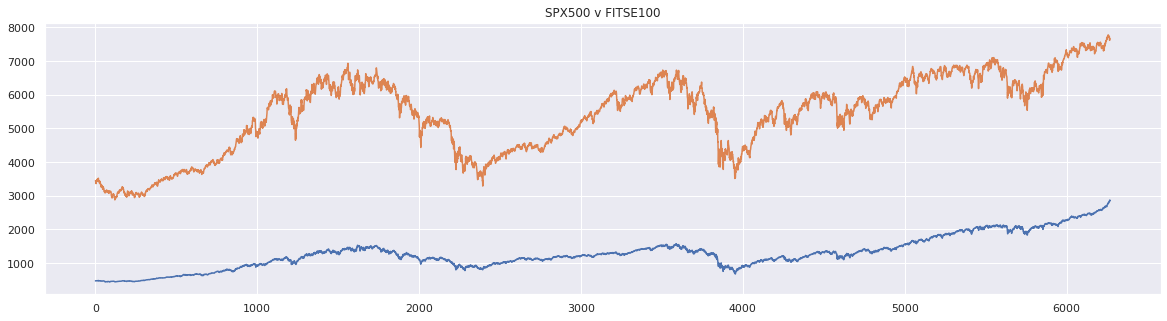

In [12]:
# spx and ftse columns
data.spx.plot(figsize= (20,5))
data.ftse.plot(figsize= (20,5))
plt.title('SPX500 v FITSE100')
plt.show()

## QQ PLot - Quantie Quantile Plot
Is a tool used in analytics to determine whether a data set is distributed in a certain way. 

Its usually showcases how the data fits a Normal Distribution.

In [0]:
import scipy.stats
import pylab

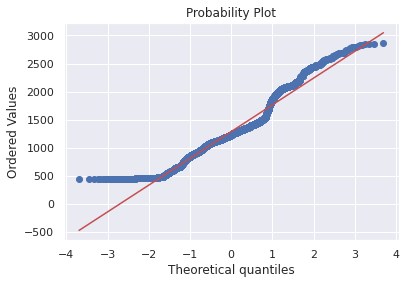

In [14]:
scipy.stats.probplot(data.spx, plot=pylab)
pylab.show()

## Transforming String inputs into DateTime Values 

In [15]:
# Check for lenght of the time period
data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [16]:
data.date.describe()

count           6269
unique          6269
top       14/01/1998
freq               1
Name: date, dtype: object

In [17]:
# Convert test to date type
data.date = pd.to_datetime(data.date, dayfirst=True)

data.date.head()

0   1994-01-07
1   1994-01-10
2   1994-01-11
3   1994-01-12
4   1994-01-13
Name: date, dtype: datetime64[ns]

## Using dates as Indices
For a set of values to be refered to as a timeseries, each value should correspond to a time period.

In [0]:
# Setting the Index
data.set_index("date", inplace = True)

In [19]:
# Let's verify if our data column has been set to index
data.head()
#observe that the date column now replaces the integer index column

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the Desired Frequency

In [0]:

data =  data.asfreq('d')

In [21]:
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


The empty rows shows that we generated new periods which do not have values associated with them.

The solution is "setting the parameter  'd' to 'b' which signifises business days ".

In [0]:
data =  data.asfreq('b')

In [23]:
# Observe how we the missing rows are now eliminated
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling missing Values
We handle missing values in a time series data using the following:

* **Front Filliing:** Assigns the value of the previous period

* **Back Filling:** Assigns values for the next period

* **Assigning the same value:** Assigns the average to all the missing values within the time series

In [24]:
data.isna().sum()
# Observe that we have 8 missing values in each column

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [0]:
# FrontFIll
data.spx = data.spx.fillna(method="ffill")


In [26]:
data.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [0]:
# BackFIll
data.ftse = data.ftse.fillna(method="bfill")


In [28]:
# FrontFIll
data.isna().sum()


spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [0]:
# Average
data.dax = data.dax.fillna(value=data.dax.mean())

In [30]:
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [0]:
# BackFIll
data.nikkei = data.nikkei.fillna(method="bfill")


In [32]:
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Adding and Removing Columns in a Data Frame 

In [0]:
# Simplifying the dataset
data['market_value'] = data.spx

In [34]:
data.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.597179,1288.642547
std,487.868210,2752.604984,1145.568370,4043.683038,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [0]:
# remove the all other columns original column
del data['spx'],  data['ftse'],  data['nikkei'], data['dax']

In [39]:
data.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Splitting up the Data

We'll split our data into 2 sets:
training and testing sets

ii. compare predictions to actual values

iii. The closer the forcasts, the better the model

TS data does not allow for shuffling due to the chroological order of the data.

We'll set our size to about 80% of our data and use it as the training set, the test set takes the remaingin data

In [41]:
size = int(len(data)*0.8)
size

5021

In [0]:
df = data.iloc[:size]

In [48]:
df_test = data.iloc[size:]
df_test.shape

(1256, 1)

In [49]:
df.shape

(5021, 1)

In [52]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [51]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


Since the df ends on 5ht (Friday) and the df_test starts on 8th (Monday). We can conclude that there is no overlap between tthe two dataframes.

In [0]:
import yfinance
import warnings
warnings.filterwarnings("ignore")

Then, we have the start and end arguments, which are pretty much self-explanatory. The only important factor here is the format of the dates. We’re using a YYYY/MM/DD format, so make sure to enter the correct start and end dates if you wish to switch them up.

The interval argument sets the frequency of the data. Since we’re using daily values, we set it equal to 1 day.

In [57]:
# we’re using the download method to scrape our data from the Yahoo Finance webpage.
data = yfinance.download(tickers="^GSPC ^FTSE ^N225 ^GDAXI", start="1994-01-07", end="2019-09-27", interval ='1d', group_by='ticker', auto_adjust=True, treads=True)

[*********************100%***********************]  4 of 4 completed


And the group_by argument groups all the data we’re importing based on the time series (tickers) it belongs to.

What about the auto_adjust column? Well, it simply replaces the closing prices with the adjusted closing prices based on the Open-High-Closing method. If we leave it as “False”, which is the default value, we’ll have Closing and Adjusted Closing Prices for each period of each time series. Therefore, we’re just limiting surplus data, since the adjusted closing prices is what we use in our analysis anyway.

Lastly, the treads argument is related to how we download the data when we’re dealing with massive amounts of data. Usually, leaving it as True is preferable.

Moving on to cell number 4. Here, we’re just creating a copy of the data set, so that we don’t have to scrape it anew if we happen to remove or alter elements by accident.

In [61]:
data_new = data.copy()
data_new.head()

^N225                ...        ^FTSE       
                    Open          High  ...        Close Volume
Date                                    ...                    
1994-01-07  17842.980469  18131.410156  ...  3446.000000    0.0
1994-01-10  18186.519531  18567.060547  ...  3440.600098    0.0
1994-01-11  18481.849609  18671.669922  ...  3413.800049    0.0
1994-01-12  18447.339844  18807.080078  ...  3372.000000    0.0
1994-01-13  18770.380859  18823.380859  ...  3360.000000    0.0

[5 rows x 20 columns]

Since notation like “^GDAXI” or “^N225” can be extremely confusing, we decide to add new columns to our data frame with the names we’re familiar with from our original data set. Of course, as stated before, we’re only using the closing prices, so we solely need the “Close” column of each time series.

In [0]:
# Adding new columns to the dataset
data_new['^SPX'] = data['^GSPC'].Close
data_new['^dax'] = data['^GDAXI'].Close
data_new['^ftse'] = data['^FTSE'].Close
data_new['^nikkei'] = data['^N225'].Close

What we do next is to remove the first elements of each time series, because of how the download method is coded. Due to the fact that the closing and opening times vary when the data is stored, the dataset always starts 1 period before the “start” argument we set.

In [0]:
# removing the first eleents, since we always start 1 period before the first, due to time zone difference
data_new = data_new.iloc[1:]
# Removing the original tickers of the data
del data_new['^N225']
del data_new['^GSPC']
del data_new['^GDAXI']
del data_new['^FTSE']

data_new = data_new.asfreq('b')
data_new = data_new.fillna(method='ffill')

After taking care of that, we remove the surplus data. Since we already stored the closing prices in the new columns we created, we can get rid of the original series we scraped from the site.


Of course, the last two lines of the 6th cell once again set the frequency and handle any missing values.

Now, the 7th cell in the code is only there to see how we’ve done so far. The head method helps us make sure the initial elements of our data set are the same as the ones from the CSV file. The tail method is there to make sure we’ve correctly included all the data up to the period we are interested in.

In [65]:
print(data_new.head(), '\n')
print(data_new.tail())

                  ^SPX         ^dax        ^ftse       ^nikkei
                                                              
Date                                                          
1994-01-10  475.269989  2225.000000  3440.600098  18443.439453
1994-01-11  474.130005  2228.100098  3413.800049  18485.250000
1994-01-12  474.170013  2182.060059  3372.000000  18793.880859
1994-01-13  472.470001  2142.370117  3360.000000  18577.259766
1994-01-14  474.910004  2151.050049  3400.600098  18973.699219 

                   ^SPX          ^dax        ^ftse       ^nikkei
                                                                
Date                                                            
2019-09-23  2991.780029  12342.330078  7326.100098  22079.089844
2019-09-24  2966.600098  12307.150391  7291.399902  22098.839844
2019-09-25  2984.870117  12234.179688  7290.000000  22020.150391
2019-09-26  2977.620117  12288.540039  7351.100098  22048.240234
2019-09-27  2977.620117  12288.540039  